<a href="https://colab.research.google.com/github/karlavalentinbaena/Transformaciones3D/blob/main/Figuras3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elige la figura que deseas manipular:
1. Cubo
2. Prisma
3. Tetraedro
4. Octaedro
5. Salir
Opción: 3
Ingresa las coordenadas del vértice 1 (x, y, z): 1,1,1
Ingresa las coordenadas del vértice 2 (x, y, z): -1,-1,1
Ingresa las coordenadas del vértice 3 (x, y, z): -1,1,-1
Ingresa las coordenadas del vértice 4 (x, y, z): 1,-1,-1
Elige la transformación que deseas aplicar:
1. Trasladar
2. Rotar
3. Redimensionar
Opción: 2
Ingresa el ángulo de rotación en grados: 45
Ingresa el eje de rotación (x, y, z): z
Ingresa el punto pivote de rotación (x, y, z): -1,1,-1
Coordenadas de la figura después de la rotación:
[[ 0.41421356 -0.41421356  1.        ]
 [-2.41421356 -0.41421356  1.        ]
 [-1.          1.         -1.        ]
 [-1.         -1.82842712 -1.        ]]


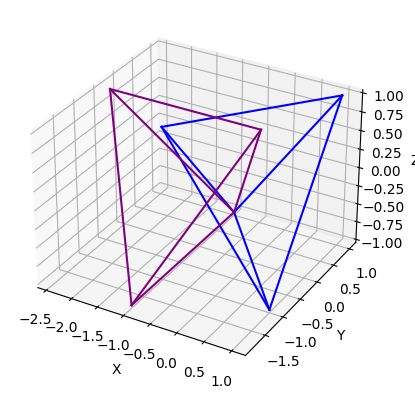

Elige la figura que deseas manipular:
1. Cubo
2. Prisma
3. Tetraedro
4. Octaedro
5. Salir
Opción: 5


In [ ]:
#EQUIPO:
#Figueroa Gonzalez Angel Gabriel
#Gordillo Vazquez Cesar Aarón
#Valentin Baena Karla

import numpy as np
import matplotlib.pyplot as plt

def trasladar_figura(vertices, vector):
    return vertices + vector

def rotar_figura(vertices, angulo, eje, pivote):
    angulo = np.radians(angulo)
    if eje == 'x':
        R = np.array([
            [1, 0, 0],
            [0, np.cos(angulo), -np.sin(angulo)],
            [0, np.sin(angulo), np.cos(angulo)]
        ])
    elif eje == 'y':
        R = np.array([
            [np.cos(angulo), 0, np.sin(angulo)],
            [0, 1, 0],
            [-np.sin(angulo), 0, np.cos(angulo)]
        ])
    elif eje == 'z':
        R = np.array([
            [np.cos(angulo), -np.sin(angulo), 0],
            [np.sin(angulo), np.cos(angulo), 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Hay un error. Debe ser 'x', 'y' o 'z'.")
    vertices_centrados = vertices - pivote
    vertices_rotados = vertices_centrados
    return vertices_rotados + pivote

# redimensionar una figura
def redi_figura(vertices, escala):
    factores_escala = [porcentaje / 100 for porcentaje in escala]
    return [[vertice[0] * factores_escala[0], vertice[1] * factores_escala[1], vertice[2] * factores_escala[2]] for vertice in vertices]

def i_traslacion():
    vector = input("Ingresa los valores de traslación (dx, dy, dz): ").split(',')
    return np.array([float(vector[0]), float(vector[1]), float(vector[2])])

def i_rotacion():
    angulo = float(input("Ingresa el ángulo de rotación en grados: "))
    eje = input("Ingresa el eje de rotación (x, y, z): ").lower()
    pivote = input("Ingresa el punto pivote de rotación (x, y, z): ").split(',')
    pivote = np.array([float(pivote[0]), float(pivote[1]), float(pivote[2])])
    return angulo, eje, pivote

def i_redimension():
    factores = input("Ingresa los factores de redimensionamiento (fx, fy, fz): ").split(',')
    return np.array([float(factores[0]), float(factores[1]), float(factores[2])])

def sel_transformacion(vertices):
    print("Elige la transformación que deseas aplicar:")
    print("1. Trasladar")
    print("2. Rotar")
    print("3. Redimensionar")
    opcion = input("Opción: ")

    if opcion == "1":
        vector_traslacion = i_traslacion()
        vertices_mod = trasladar_figura(vertices, vector_traslacion)
    elif opcion == "2":
        angulo_rotacion, eje_rotacion, pivote_rotacion = i_rotacion()
        vertices_mod = rotar_figura(vertices, angulo_rotacion, eje_rotacion, pivote_rotacion)
        print("Coordenadas de la figura después de la rotación:")
        print(vertices_mod)
    elif opcion == "3":
        factores_redi = i_redi()
        vertices_mod = redi_figura(vertices, factores_redi)
    else:
        print("La opcion está mal")
        vertices_mod = vertices

    return vertices_mod

def dib_figura(vertices_original, vertices_mod, aristas):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for arista in aristas:
        x_values = [vertices_original[arista[0]][0], vertices_original[arista[1]][0]]
        y_values = [vertices_original[arista[0]][1], vertices_original[arista[1]][1]]
        z_values = [vertices_original[arista[0]][2], vertices_original[arista[1]][2]]
        ax.plot(x_values, y_values, z_values, color='blue')

    for arista in aristas:
        x_values = [vertices_mod[arista[0]][0], vertices_mod[arista[1]][0]]
        y_values = [vertices_mod[arista[0]][1], vertices_mod[arista[1]][1]]
        z_values = [vertices_mod[arista[0]][2], vertices_mod[arista[1]][2]]
        ax.plot(x_values, y_values, z_values, color='purple')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Dibujar cubo
def dib_cubo():
    vertices_original = [
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
    ]
    aristas = [
        [0, 1], [1, 2], [2, 3], [3, 0],
        [4, 5], [5, 6], [6, 7], [7, 4],
        [0, 4], [1, 5], [2, 6], [3, 7]
    ]

    vertices_mod = sel_transformacion(np.array(vertices_original))
    dib_figura(vertices_original, vertices_mod, aristas)

# Dibujar prisma
def dib_prisma():
    num_vertices_base = int(input("Ingresa el número de vértices de la base del prisma: "))
    vertices_base = []
    for i in range(num_vertices_base):
        coordenadas = input(f"Ingresa las coordenadas del vértice {i+1} de la base (x, y, z): ").split(',')
        vertices_base.append([float(coordenadas[0]), float(coordenadas[1]), float(coordenadas[2])])

    num_vertices_tapa = int(input("Ingresa el número de vértices de la tapa del prisma: "))
    vertices_tapa = []
    for i in range(num_vertices_tapa):
        coordenadas = input(f"Ingresa las coordenadas del vértice {i+1} de la tapa (x, y, z): ").split(',')
        vertices_tapa.append([float(coordenadas[0]), float(coordenadas[1]), float(coordenadas[2])])

    vertices_o = vertices_base + vertices_tapa
    vertices_mod = sel_transformacion(np.array(vertices_o))

    aristas_base = [[i, (i+1) % num_vertices_base] for i in range(num_vertices_base)]
    aristas_tapa = [[num_vertices_base + i, num_vertices_base + (i+1) % num_vertices_tapa] for i in range(num_vertices_tapa)]
    aristas_laterales = [[i, num_vertices_base + i] for i in range(min(num_vertices_base, num_vertices_tapa))]
    aristas = aristas_base + aristas_tapa + aristas_laterales

    dib_figura(vertices_o, vertices_mod, aristas)

# Dibujartetraedro
def dib_tetraedro():
    vertices_o = []
    for i in range(4):
        coordenadas = input(f"Ingresa las coordenadas del vértice {i+1} (x, y, z): ").split(',')
        vertices_o.append([float(coordenadas[0]), float(coordenadas[1]), float(coordenadas[2])])

    vertices_modificados = sel_transformacion(np.array(vertices_o))

    aristas = [
        [0, 1], [1, 2], [2, 0], [0, 3],
        [1, 3], [2, 3]
    ]

    dib_figura(vertices_o, vertices_modificados, aristas)

# Dibujar  octaedro
def dib_octaedro():
    vertices_original = []
    for i in range(6):
        coordenadas = input(f"Ingresa las coordenadas del vértice {i+1} (x, y, z): ").split(',')
        vertices_original.append([float(coordenadas[0]), float(coordenadas[1]), float(coordenadas[2])])
    for vertice in vertices_original:
        vertice[2] *= 2
    vertices_modificados = sel_transformacion(np.array(vertices_original))

    aristas = [
        [0, 1], [0, 2], [0, 3], [0, 4],
        [1, 2], [2, 3], [3, 4], [4, 1],
        [1, 5], [2, 5], [3, 5], [4, 5]
    ]

    dib_figura(vertices_original, vertices_modificados, aristas)

def menu():
    while True:
        print("Elige la figura que deseas manipular:")
        print("1. Cubo")
        print("2. Prisma")
        print("3. Tetraedro")
        print("4. Octaedro")
        print("5. Salir")
        opcion = input("Opción: ")

        if opcion == "1":
            dib_cubo()
        elif opcion == "2":
            dib_prisma()
        elif opcion == "3":
            dib_tetraedro()
        elif opcion == "4":
            dib_octaedro()
        elif opcion == "5":
            break
        else:
            print("Opción no válida. Inténtalo de nuevo.")
menu()
